# Restaurants Sale during Covid(EDA)

* ### In this project we will know the sales and how the restaurants acts during the period of COVID
* ### What makes the difference in sales, people food consumption and behavior during 2020 and how it effects on future restaurants

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# About Dataset

### In this project 3 different datasets are used

1. Top250.csv - The Top 500 Chain Restaurant Report is a measure of the largest restaurant sales from 2020
* Rank - This column contain the rank of all 250 restaurants
* Restaurant - Name of the restaurant
* Content - content about the restaurants their achievement and highlited points.
* Sales- Sales done by each restaurants
* YOY Sales - growth or decline of a sales over a twelve-month period.
* Unit- Number of premisis
* YOY Units - growth or decline of a units over a twelve-month period.
* Headquaters - location of the restaurants headquaters.
* Segment_category - Type of food each reastaurant serve

2. Independence100.csv - Top 100 Independents ranking is a measure of the highest-grossing independent restaurants

* Rank - rank of all 250 restaurants
* Restaurant - Name of the restaurant
* Sales- Sales done by each restaurants
* average_check - Average client expenses per visit (sales / number of visits)
* city- City of origin of the restaurant
* State - State of origin of the restaurant
* Meals Served - Number of meals served in a year

3. Future50.csv - "Future ranking" of 50 restuarants from 2020

* Rank - This column contain the rank of all 250 restaurants
* Restaurant - Name of the restaurant
* Location - Location of origin of the restaurant
* Sales- Sales done by each restaurants
* YOY Sales - growth or decline of a sales over a twelve-month period.
* Unit- Number of premisis
* YOY Units - growth or decline of a units over a twelve-month period.
* Unit volume - 2019 Average Unit Volume
* Franchising - Is the restaurant a franchise? (Y/N)

4- Food_Supply_Quantity_kg_Data.csv - This dataset contains the information about different countries, category of food the consume, deaths during covid, confirmed cased, recovered, active cases and population



# Importing Datasets

In [2]:
df_250= pd.read_csv('Top250.csv')
df_ind= pd.read_csv('Independence100.csv')
df_future=pd.read_csv('Future50.csv')

In [6]:
df_250.sample(10)

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
120,121,Big Boy/Frisch's Big Boy,NaN,338,-3.4%,194,-3.0%,"Warren, MI",Family Style
11,12,Chipotle Mexican Grill,NaN,5509,14.8%,2584,5.3%,NaN,Fast Casual & Mexican
230,231,Old Country Buffet/HomeTown Buffet,NaN,142,-18.8%,49,-24.6%,NaN,Family Casual
21,22,Buffalo Wild Wings,NaN,3669,-0.1%,1206,-0.2%,NaN,Casual Dining & Sports Bar
83,84,Freddy's Frozen Custard & Steakburgers,NaN,535,12.9%,368,12.2%,NaN,Fast Casual & Burger
185,186,Golden Chick,NaN,183,6.7%,184,0.5%,NaN,Chicken
63,64,Cheddar's Scratch Kitchen,NaN,724,0.6%,175,2.9%,NaN,Casual Dining & Varied Menu
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger
155,156,Uncle Julio's,NaN,239,11.7%,36,2.9%,NaN,Mexican
202,203,Black Angus Steakhouse,NaN,168,1.6%,42,-4.5%,NaN,Steak


In [4]:
df_ind.sample(10)

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
59,60,Harry Caray's Italian Steakhouse,15680000.0,59,Chicago,Ill.,287900.0
75,76,Carmine's (Atlantic City),13987843.0,39,Atlantic City,N.J.,129630.0
51,52,Abe & Louie's,17063477.0,106,Boston,Mass.,160762.0
98,99,Upland,11965564.0,52,New York,N.Y.,171825.0
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
70,71,Cliff House,14465847.0,40,San Francisco,Calif.,199901.0
93,94,"Carmine's (Washington, D.C.)",12228168.0,39,Washington,D.C.,148135.0
45,46,Swift & Sons,17637400.0,119,Chicago,Ill.,195343.0
73,74,Timberline Steaks and Grille,14362103.0,37,Denver,Colo.,553378.0


In [5]:
df_future.sample(10)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
10,11,Eggs Up Grill,"Spartanburg, S.C.",30,35.4%,41,36.7%,860,Yes
26,27,Bibibop Asian Grill,"Columbus, Ohio",44,24.6%,37,23.3%,1330,No
29,30,The Pizza Press,"Anaheim, Calif.",27,23.7%,27,22.7%,1130,Yes
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
24,25,By Chloe,"New York, N.Y.",37,25.6%,14,7.7%,2800,No
40,41,Blue Sushi Sake Grill,"Omaha, Neb.",49,19.5%,14,16.7%,3500,No
5,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes
43,44,Tacos 4 Life,"Conway, Ark.",25,18.4%,16,6.7%,1620,Yes
14,15,Original ChopShop,"Plano, Texas",21,32.5%,12,20.0%,1930,No
22,23,The Little Beet,"New York, N.Y.",23,26.5%,12,33.3%,2230,No


# Feature Engineering

* In df_250 dataset which contains top 250 restaurant most of the values in "Content" and "Headquaters" columns are null also not useful for further analysis so we can drop both columns.

In [6]:
df_250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              250 non-null    int64 
 1   Restaurant        250 non-null    object
 2   Content           33 non-null     object
 3   Sales             250 non-null    int64 
 4   YOY_Sales         250 non-null    object
 5   Units             250 non-null    int64 
 6   YOY_Units         250 non-null    object
 7   Headquarters      52 non-null     object
 8   Segment_Category  250 non-null    object
dtypes: int64(3), object(6)
memory usage: 17.7+ KB


In [7]:
df_250.drop(['Content','Headquarters'],axis=1,inplace=True)

In [8]:
df_250.head()

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category
0,1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service & Burger
1,2,Starbucks,21380,8.6%,15049,3.0%,Quick Service & Coffee Cafe
2,3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service & Chicken
3,4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service & Mexican
4,5,Burger King,10204,2.7%,7346,0.2%,Quick Service & Burger


In [9]:
print('Rows:', df_250.shape[0])
print('-'*100)
print('Columns:', df_250.shape[1])
print('-'*100)
print('Unique_values:', df_250.nunique())
print('-'*100)
print('Missing_values:',df_250.isnull().sum())

Rows: 250
----------------------------------------------------------------------------------------------------
Columns: 7
----------------------------------------------------------------------------------------------------
Unique_values: Rank                250
Restaurant          250
Sales               203
YOY_Sales           172
Units               214
YOY_Units           140
Segment_Category     48
dtype: int64
----------------------------------------------------------------------------------------------------
Missing_values: Rank                0
Restaurant          0
Sales               0
YOY_Sales           0
Units               0
YOY_Units           0
Segment_Category    0
dtype: int64


### Remaning columns for better understanding
* Units with Branches & Segment_category with Sub_category

### Also checking for independent Restaurent in top_250 restaurants

In [10]:
df_250.rename(columns={'Units':'Branches', 'Segment_Category': 'Sub_category'}, inplace=True)

In [11]:
rest_ind=list(df_ind['Restaurant'].values)
df_250['Independent']=df_250['Restaurant'].apply(lambda x: 1 if x in rest_ind  else 0)
df_250['Independent'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 250 entries, 0 to 249
Series name: Independent
Non-Null Count  Dtype
--------------  -----
250 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [12]:
df_250.head()

,Rank,Restaurant,Sales,YOY_Sales,Branches,YOY_Units,Sub_category,Independent
0,1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service & Burger,0
1,2,Starbucks,21380,8.6%,15049,3.0%,Quick Service & Coffee Cafe,0
2,3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service & Chicken,0
3,4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service & Mexican,0
4,5,Burger King,10204,2.7%,7346,0.2%,Quick Service & Burger,0


### Dealing with floats instead of percentages

In [13]:
df_250['YOY_Sales']=df_250['YOY_Sales'].str.strip('%').replace('%','')
df_250['YOY_Units']=df_250['YOY_Units'].str.strip('%').replace('%','')
df_250['YOY_Sales']= pd.to_numeric(df_250['YOY_Sales'])
df_250['YOY_Units']=pd.to_numeric(df_250['YOY_Units'])

In [14]:
df_250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          250 non-null    int64  
 1   Restaurant    250 non-null    object 
 2   Sales         250 non-null    int64  
 3   YOY_Sales     250 non-null    float64
 4   Branches      250 non-null    int64  
 5   YOY_Units     250 non-null    float64
 6   Sub_category  250 non-null    object 
 7   Independent   250 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 15.8+ KB


In [15]:
df_250.describe()

,Rank,Sales,YOY_Sales,Branches,YOY_Units,Independent
count,250.000000,250.00000,250.000000,250.000000,250.000000,250.0
mean,125.500000,1242.74000,2.938400,850.076000,1.219200,0.0
std,72.312977,3365.22882,8.953784,2296.151659,7.936431,0.0
min,1.000000,126.00000,-21.200000,13.000000,-32.800000,0.0
25%,63.250000,181.00000,-2.375000,85.000000,-2.025000,0.0
50%,125.500000,330.00000,2.200000,207.000000,0.000000,0.0
75%,187.750000,724.75000,6.575000,555.250000,3.475000,0.0
max,250.000000,40412.00000,39.500000,23801.000000,38.500000,0.0


### Looking for YOY sales and YoY Units if it is positive on negative

In [16]:
df_250['Sales_Year']=df_250['YOY_Sales'].apply(lambda x : 'Positive' if x>0 else 'Negative')
df_250['Unit_stats']=df_250['YOY_Units'].apply(lambda x : 'Positive' if x>0 else 'Negative')

### Splitting through Sub_Category to find the Category feature

In [17]:
df_250.head()

,Rank,Restaurant,Sales,YOY_Sales,Branches,YOY_Units,Sub_category,Independent,Sales_Year,Unit_stats
0,1,McDonald's,40412,4.9,13846,-0.5,Quick Service & Burger,0,Positive,Negative
1,2,Starbucks,21380,8.6,15049,3.0,Quick Service & Coffee Cafe,0,Positive,Positive
2,3,Chick-fil-A,11320,13.0,2470,5.0,Quick Service & Chicken,0,Positive,Positive
3,4,Taco Bell,11293,9.0,6766,2.7,Quick Service & Mexican,0,Positive,Positive
4,5,Burger King,10204,2.7,7346,0.2,Quick Service & Burger,0,Positive,Positive


In [18]:
df_250['Sub_category'].unique()

array(['Quick Service & Burger', 'Quick Service & Coffee Cafe',
       'Quick Service & Chicken', 'Quick Service & Mexican',
       'Quick Service & Sandwich', 'Quick Service & Pizza',
       'Fast Casual & Bakery Cafe', 'Fast Casual & Mexican',
       'Casual Dining & Italian/Pizza', 'Casual Dining & Varied Menu',
       'Fast Casual & Asian/Noodle', 'Quick Service & Frozen Desserts',
       'Casual Dining & Sports Bar', 'Family Dining & Family Style',
       'Casual Dining & Steak', 'Casual Dining & Seafood',
       'Fast Casual & Sandwich', 'Fast Casual & Chicken',
       'Quick Service & Family Casual', 'Fast Casual & Burger',
       'Casual Dining & Asian', 'Quick Service & Snack', 'Steak',
       'Quick Service & Beverage', 'Sports Bar',
       'Quick Service & Seafood', 'Quick Service & Bakery Cafe',
       'Fast Casual & Pizza', 'Fine Dining & Steak', 'Mexican',
       'Varied Menu', 'Chicken', 'Italian/Pizza', 'Pizza', 'Seafood',
       'Frozen Desserts', 'Coffee Cafe', 'BBQ',

In [19]:
df_250["Category"]=df_250['Sub_category'].apply(lambda x:x.replace('Quick Service & Burger','Burger').replace('Quick Service & Coffee Cafe','Cafe')
                  .replace('Quick Service & Chicken','Chicken').replace('Quick Service & Mexican','Mexican').replace('Quick Service & Sandwich','Sandwich')
                  .replace('Quick Service & Pizza','Pizza').replace('Fast Casual & Bakery Cafe','Cafe').replace('Fast Casual & Mexican','Mexican')
                  .replace('Casual Dining & Italian/Pizza', 'Pizza').replace('Casual Dining & Varied Menu','Varied Menu').replace('Fast Casual & Asian/Noodle','Asian')
                  .replace('Quick Service & Frozen Desserts','Desserts').replace('Casual Dining & Sports Bar','Bar').replace('Family Dining & Family Style','Family')
                  .replace('Casual Dining & Steak','Meat').replace('Casual Dining & Seafood','Seafood').replace('Fast Casual & Sandwich','Sandwich').replace('Fast Casual & Chicken','Chicken')
                  .replace('Quick Service & Family Casual','Family').replace('Fast Casual & Burger','Burger').replace('Casual Dining & Asian','Asian').replace('Quick Service & Snack','Snack')
                  .replace('Steak','Meat').replace('Quick Service & Beverage','Drinks').replace('Sports Bar','Bar').replace('Quick Service & Seafood','Seafood')
                  .replace('Quick Service & Bakery Cafe','Cafe').replace('Fast Casual & Pizza','Pizza').replace('Fine Dining & Steak','Meat').replace('Italian/Pizza','Pizza')
                  .replace('Frozen Desserts','Desserts').replace('Coffee Cafe','Cafe').replace('BBQ','Meat').replace('Bakery Cafe','Cafe').replace('Family Style','Family')
                  .replace('Asian/Noodle','Noodle').replace('Family Casual','Family').replace('Fine Dining & Meat','Meat'))

In [20]:
df_250.head()

,Rank,Restaurant,Sales,YOY_Sales,Branches,YOY_Units,Sub_category,Independent,Sales_Year,Unit_stats,Category
0,1,McDonald's,40412,4.9,13846,-0.5,Quick Service & Burger,0,Positive,Negative,Burger
1,2,Starbucks,21380,8.6,15049,3.0,Quick Service & Coffee Cafe,0,Positive,Positive,Cafe
2,3,Chick-fil-A,11320,13.0,2470,5.0,Quick Service & Chicken,0,Positive,Positive,Chicken
3,4,Taco Bell,11293,9.0,6766,2.7,Quick Service & Mexican,0,Positive,Positive,Mexican
4,5,Burger King,10204,2.7,7346,0.2,Quick Service & Burger,0,Positive,Positive,Burger


# EDA-Data Visualization

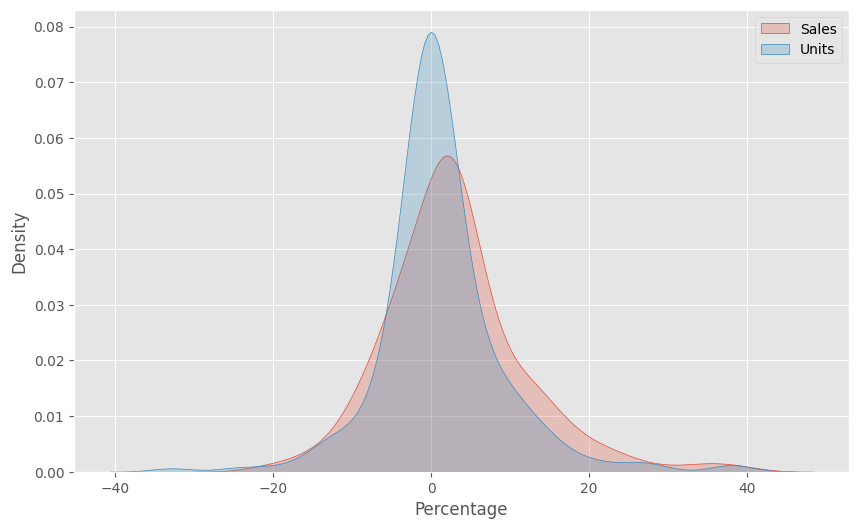

In [21]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_250['YOY_Sales'],shade=True)
sns.kdeplot(df_250['YOY_Units'],shade=True)
plt.legend(['Sales','Units'])
plt.xlabel('Percentage')
plt.show()

### These Distributions shows us that year on year sales percentage no more than 40%

# Correlation with Sales

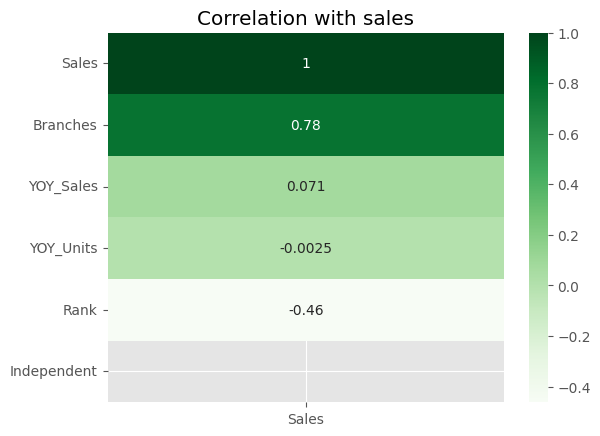

In [22]:
Corr1=df_250[['Sales','YOY_Sales','Branches','YOY_Units','Rank', 'Independent']]
Corr1 = Corr1.corr().loc[:,['Sales']]
sns.heatmap(Corr1.sort_values('Sales',ascending=False),annot=True,cbar=True,cmap='Greens')
plt.title('Correlation with sales')
plt.show()

* ### From the above heatmap we can see that Sales is highly correlated with branches

# YOY Sales and YOY Units indicator

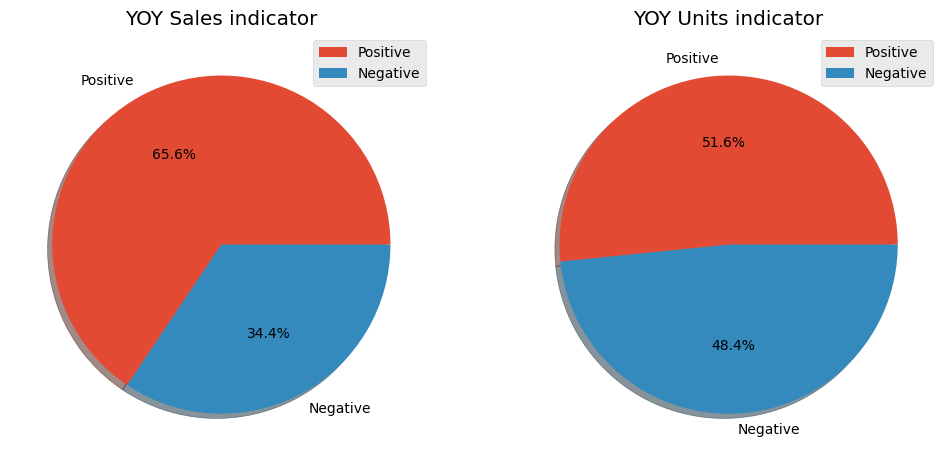

In [23]:
fig,ax=plt.subplots(1,2, figsize=(12,6))
S_indicator=df_250['Sales_Year'].value_counts()
labels=['Positive','Negative']

ax[0].pie(S_indicator,labels=labels,autopct='%1.1f%%', shadow=True)
ax[0].legend(['Positive', 'Negative'])
ax[0].set_title('YOY Sales indicator')

U_indicator=df_250['Unit_stats'].value_counts()
labels=['Positive','Negative']
ax[1].pie(U_indicator,labels=labels,autopct='%1.1f%%', shadow=True)
ax[1].legend(['Positive', 'Negative'])
ax[1].set_title('YOY Units indicator')
plt.show()

* ### Although the restaurants were on the best list during the year, about 35%  of restaurants had negative indicators in YOY sales and 48% have negative indicator in YOY units

# Category Sales Indicator

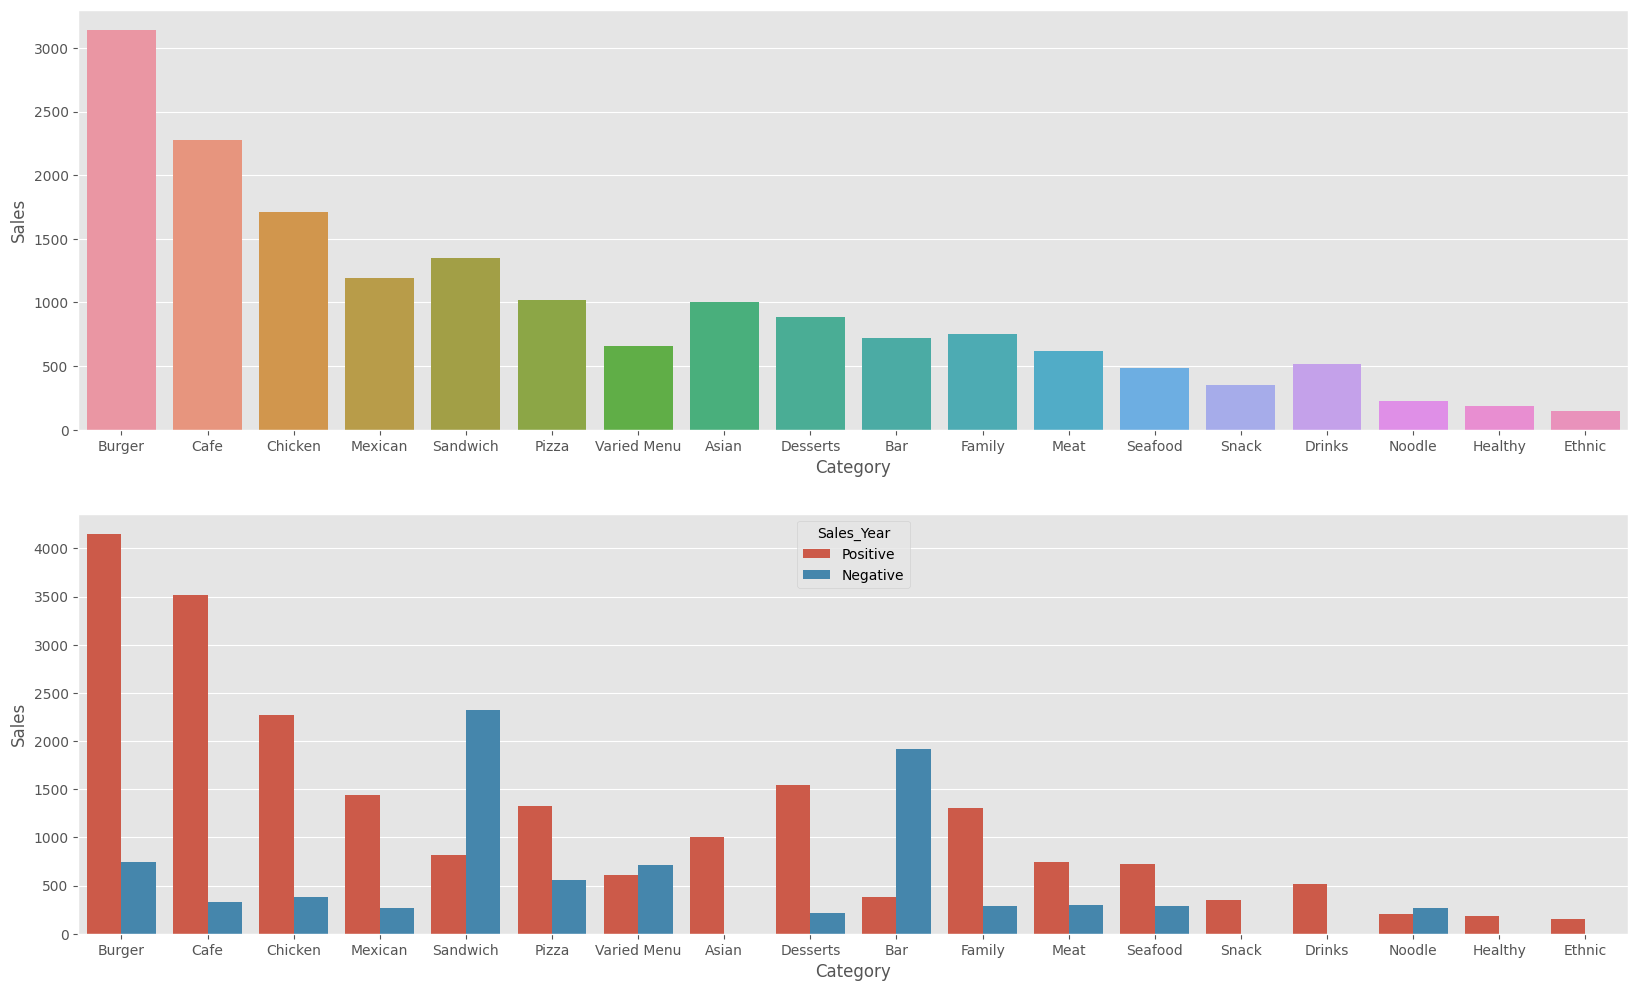

In [24]:
fig, ax=plt.subplots(2,figsize=(20,12))

sns.barplot( ax=ax[0],data=df_250, x=df_250['Category'], y=df_250['Sales'],ci=None)

sns.barplot(ax=ax[1],data=df_250,x=df_250['Category'], y=df_250['Sales'],hue=df_250['Sales_Year'],ci=None)
plt.show()


* ### Restaurant with Category Burger is having the highest sales in a year
* ### Varied menu, noodle, sandwiches and sports bar had negative indicators more than positive

# Finding top Resturants In Best Category

* ## Pizza

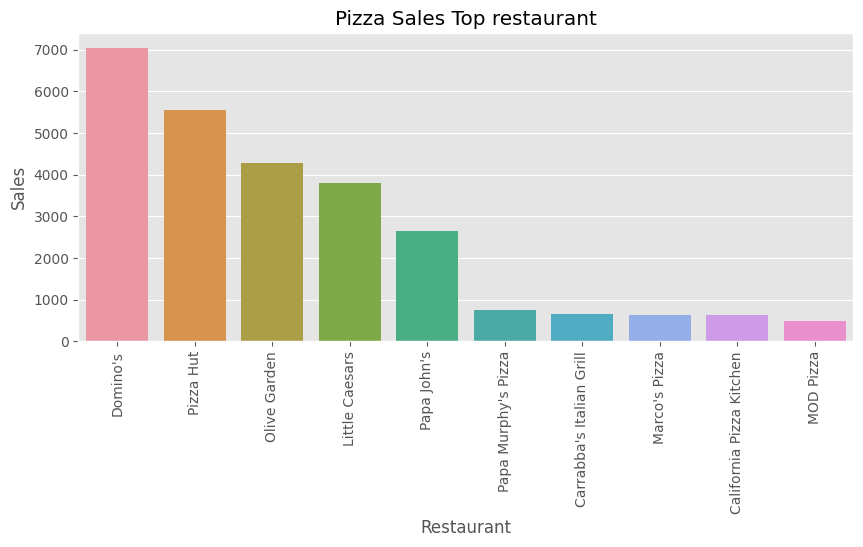

In [25]:
pizza=df_250[df_250['Category']=='Pizza'].sort_values('Sales', ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=pizza['Restaurant'], y=pizza['Sales'])
plt.xticks(rotation=90)
plt.title('Pizza Sales Top restaurant')
plt.show()

 * ## Burger

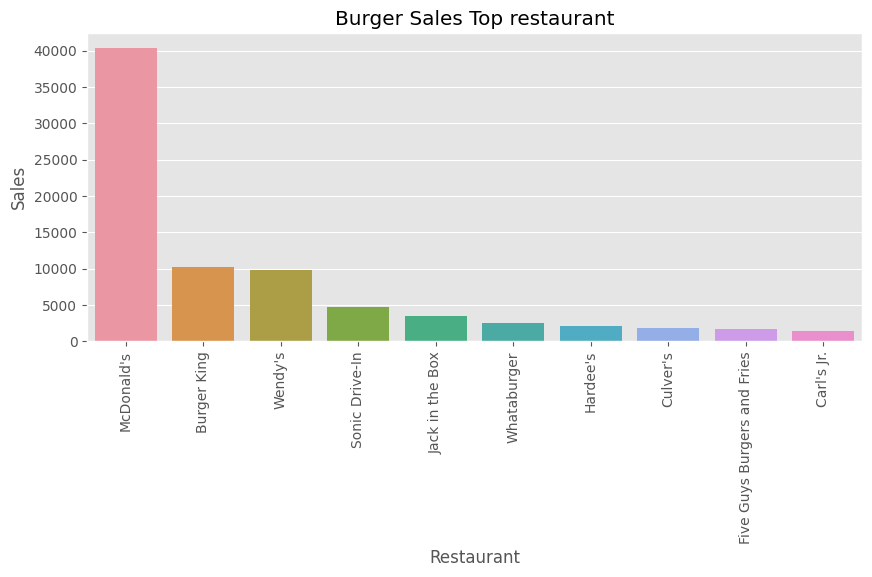

In [26]:
Burger=df_250[df_250['Category']=='Burger'].sort_values('Sales', ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=Burger['Restaurant'], y=Burger['Sales'])
plt.xticks(rotation=90)
plt.title('Burger Sales Top restaurant')
plt.show()

* ## Cafe 

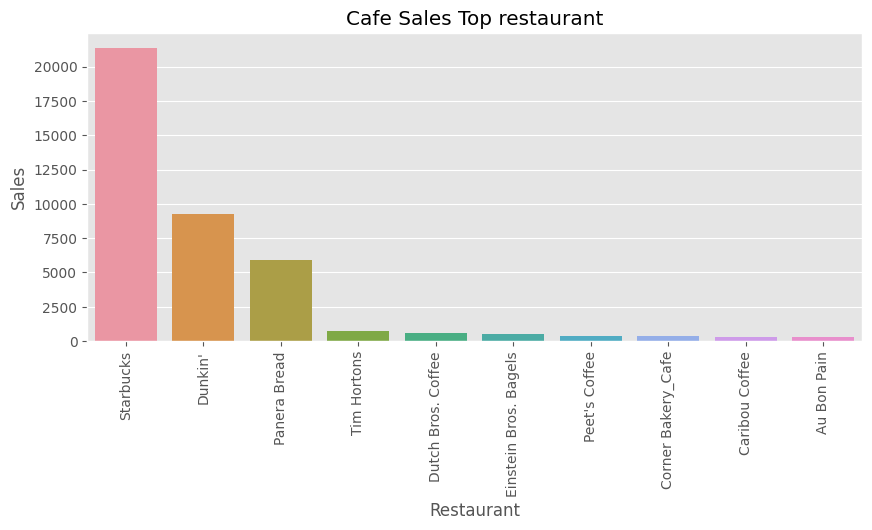

In [27]:
Cafe=df_250[df_250['Category']=='Cafe'].sort_values('Sales', ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot( x=Cafe['Restaurant'], y=Cafe['Sales'])
plt.xticks(rotation=90)
plt.title('Cafe Sales Top restaurant')
plt.show()

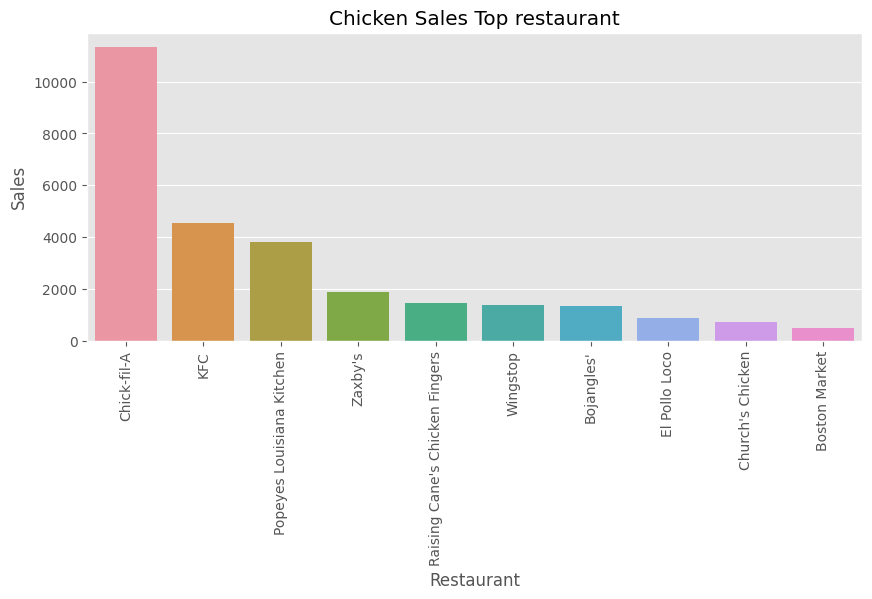

In [28]:
Chicken=df_250[df_250['Category']=='Chicken'].sort_values('Sales', ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=Chicken['Restaurant'], y=Chicken['Sales'])
plt.xticks(rotation=90)
plt.title('Chicken Sales Top restaurant')
plt.show()

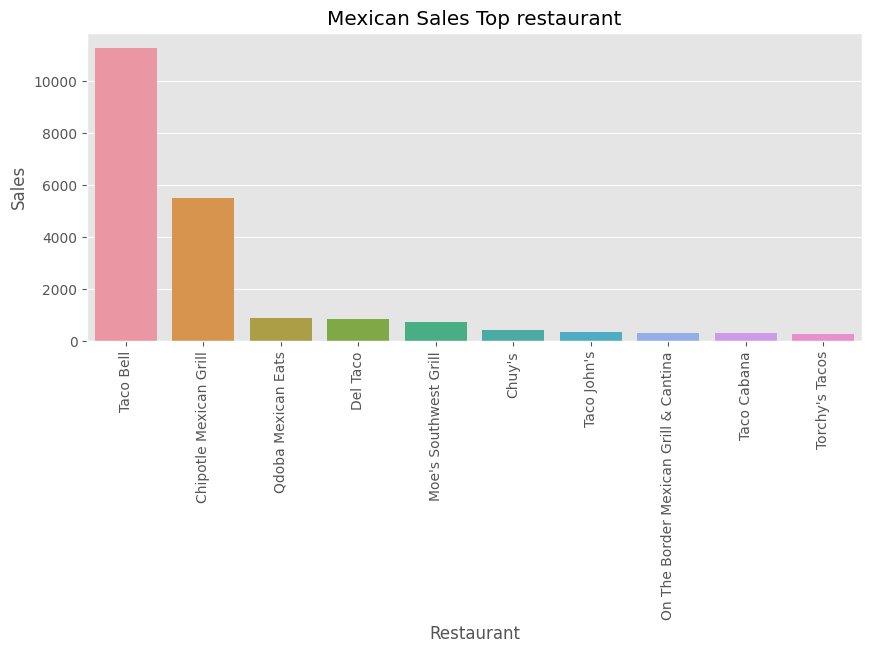

In [29]:
Mexican=df_250[df_250['Category']=='Mexican'].sort_values('Sales', ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=Mexican['Restaurant'], y=Mexican['Sales'])
plt.xticks(rotation=90)
plt.title('Mexican Sales Top restaurant')
plt.show()

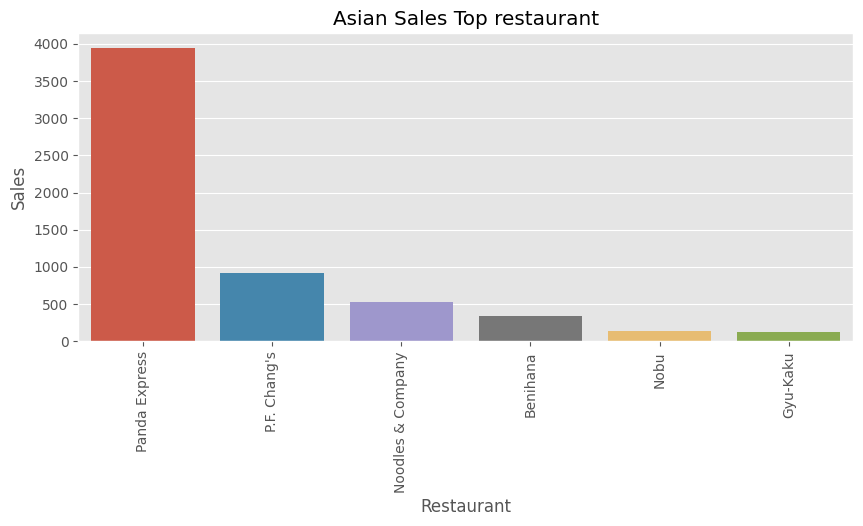

In [30]:
Asian=df_250[df_250['Category']=='Asian'].sort_values('Sales', ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=Asian['Restaurant'], y=Asian['Sales'])
plt.xticks(rotation=90)
plt.title('Asian Sales Top restaurant')
plt.show()

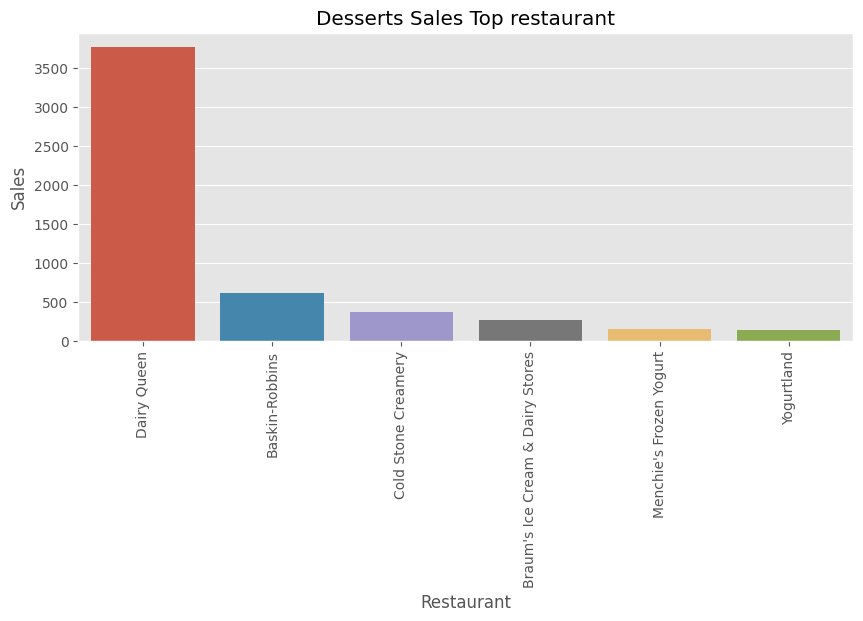

In [31]:
Desserts=df_250[df_250['Category']=='Desserts'].sort_values('Sales', ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=Desserts['Restaurant'], y=Desserts['Sales'])
plt.xticks(rotation=90)
plt.title('Desserts Sales Top restaurant')
plt.show()

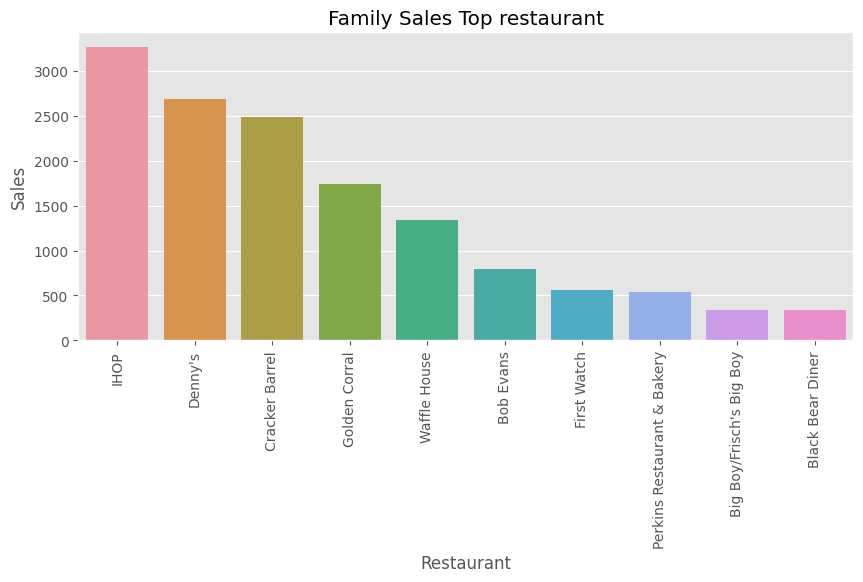

In [32]:
Family=df_250[df_250['Category']=='Family'].sort_values('Sales', ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=Family['Restaurant'], y=Family['Sales'])
plt.xticks(rotation=90)
plt.title('Family Sales Top restaurant')
plt.show()

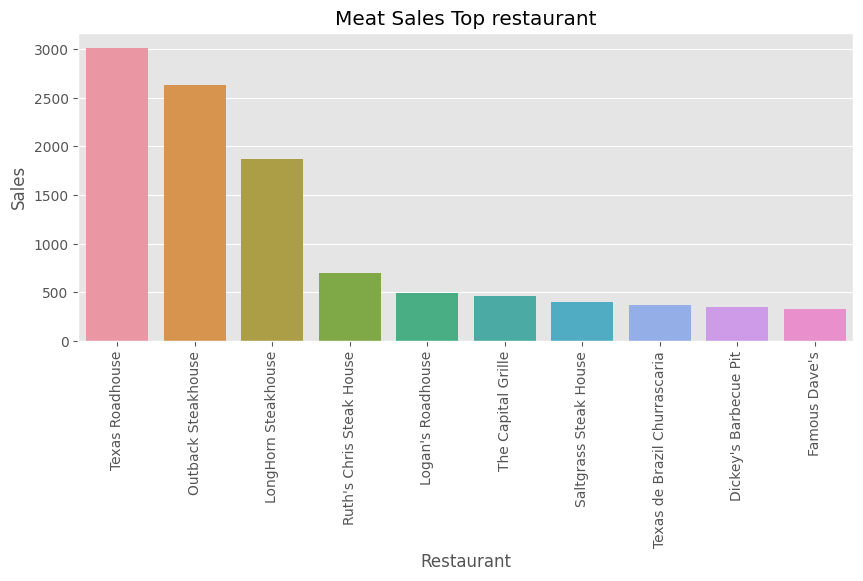

In [33]:
Meat=df_250[df_250['Category']=='Meat'].sort_values('Sales', ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=Meat['Restaurant'], y=Meat['Sales'])
plt.xticks(rotation=90)
plt.title('Meat Sales Top restaurant')
plt.show()

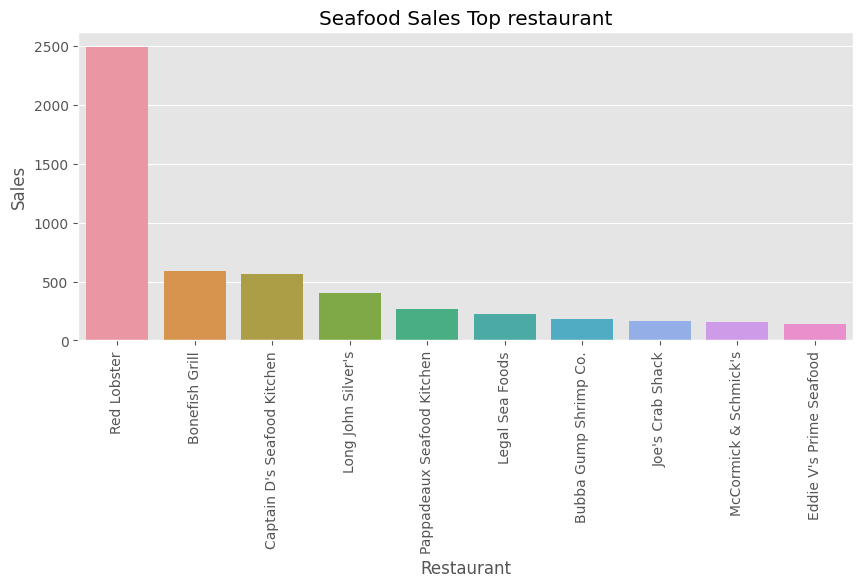

In [34]:
Seafood=df_250[df_250['Category']=='Seafood'].sort_values('Sales', ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=Seafood['Restaurant'], y=Seafood['Sales'])
plt.xticks(rotation=90)
plt.title('Seafood Sales Top restaurant')
plt.show()

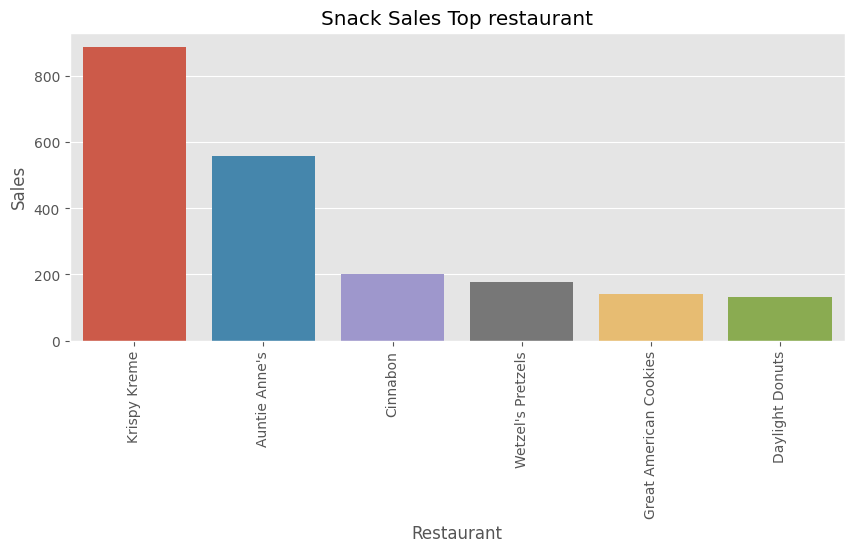

In [35]:
Snack=df_250[df_250['Category']=='Snack'].sort_values('Sales', ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=Snack['Restaurant'], y=Snack['Sales'])
plt.xticks(rotation=90)
plt.title('Snack Sales Top restaurant')
plt.show()

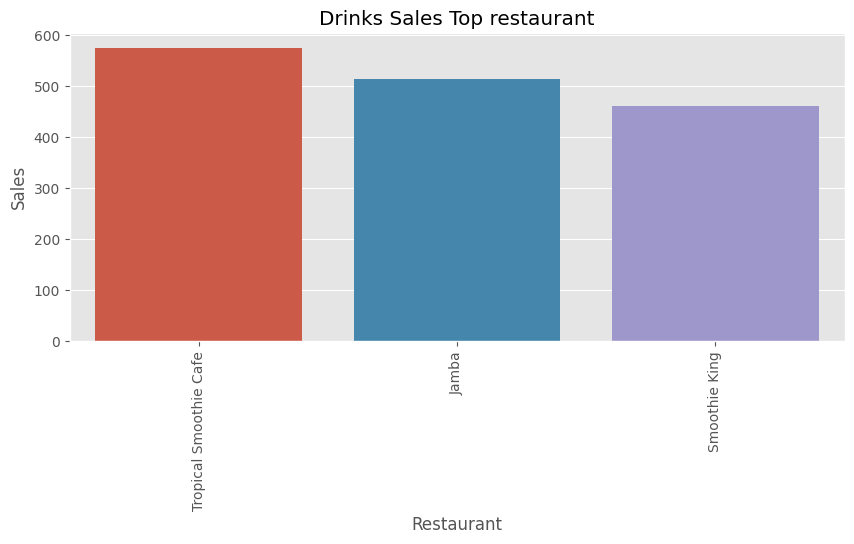

In [36]:
Drinks=df_250[df_250['Category']=='Drinks'].sort_values('Sales', ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=Drinks['Restaurant'], y=Drinks['Sales'])
plt.xticks(rotation=90)
plt.title('Drinks Sales Top restaurant')
plt.show()

# Notes

* ### Number of branches is highly correlated with Sales
* ### About 35%  of restaurants had negative indicators in YOY sales and 48% have negative indicator in YOY units
* ### Burger restaurant is having the highes sales in 2020
* ### Bar and Sandwich restaurant faces the highest losses during 2020

# Top 50 future Restaurant

### Study high sales indicates

In [37]:
df_future.sample(10)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
49,50,Gus's World Famous Fried Chicken,"Memphis, Tenn.",44,14.4%,28,7.7%,1600,Yes
42,43,Spitz Mediterranean Street Food,"Los Angeles, Calif.",28,18.8%,11,10.0%,2700,No
5,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes
44,45,Pita Mediterranean Street Food,"Fairburn, Ga.",38,17.8%,32,10.3%,1260,Yes
10,11,Eggs Up Grill,"Spartanburg, S.C.",30,35.4%,41,36.7%,860,Yes
9,10,Joella's Hot Chicken,"Louisville, Ky.",29,35.5%,17,30.8%,1930,No
18,19,Hawkers Asian Street Fare,"Orlando, Fla.",22,30.0%,7,40.0%,3800,No
22,23,The Little Beet,"New York, N.Y.",23,26.5%,12,33.3%,2230,No
25,26,Sugarfire Smokehouse,"Olivette, Mo.",39,25.4%,15,15.4%,2820,No
17,18,Vitality Bowls,"San Ramon, Calif.",37,30.1%,77,24.2%,535,Yes


# Franchising

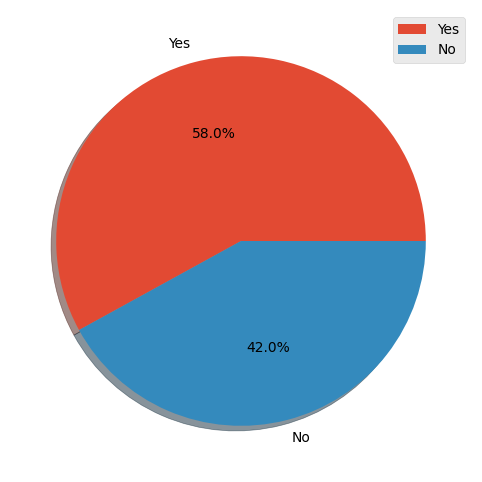

In [38]:
plt.figure(figsize=(12,6))
plt.pie(df_future['Franchising'].value_counts(),labels=('Yes', 'No'), autopct='%1.1f%%', shadow=True)
plt.legend(('Yes','No'))
plt.show()

* ### About 58% of the Restaurant are franchising and 42% of the Restaurant are not

# Franchising / Sales

In [39]:
df_future['YOY_Sales']=df_future['YOY_Sales'].apply(lambda x:x.replace('%',''))
df_future['YOY_Sales']=pd.to_numeric(df_future['YOY_Sales'])

df_future['YOY_Units']=df_future['YOY_Units'].apply(lambda x:x.replace('%',''))
df_future['YOY_Units']=pd.to_numeric(df_future['YOY_Units'])

df_future.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         50 non-null     int64  
 1   Restaurant   50 non-null     object 
 2   Location     50 non-null     object 
 3   Sales        50 non-null     int64  
 4   YOY_Sales    50 non-null     float64
 5   Units        50 non-null     int64  
 6   YOY_Units    50 non-null     float64
 7   Unit_Volume  50 non-null     int64  
 8   Franchising  50 non-null     object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.6+ KB


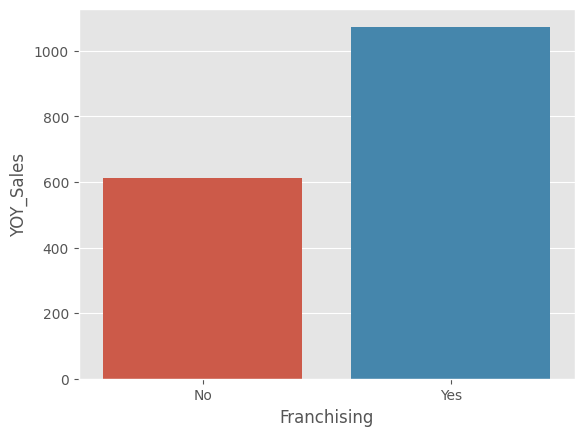

In [40]:
fran=df_future.groupby('Franchising',as_index=False).sum().get(['Franchising','YOY_Sales'])

sns.barplot(x=fran['Franchising'],y=fran['YOY_Sales'])
plt.show()


* ### From the above Bar plot we can analyse that Restaurant which are franchising having sales more than 1000 and which are not having sales more then 600

#  Correlation with YOY Sales

<Axes: >

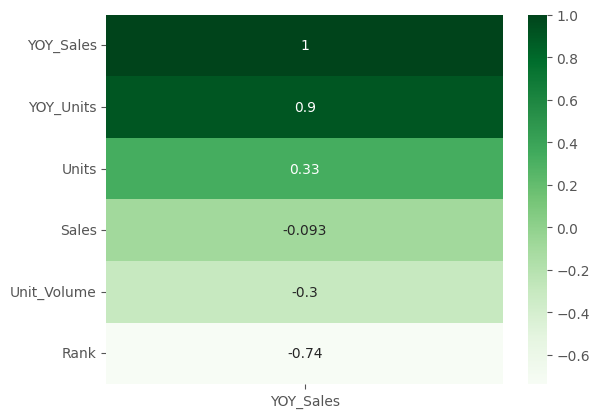

In [41]:
Corr2=df_future[['Rank','Sales','YOY_Sales','Units','YOY_Units','Unit_Volume']]
Corr2=Corr2.corr().loc[ : , ['YOY_Sales']]
sns.heatmap(Corr2.sort_values('YOY_Sales', ascending=False), cmap='Greens',cbar=True,annot=True )

# Is diet Related to your Infection with Corona

### Now we are trying to find if there is a relationship between some food products and the high rates of infection with the Coronavirus 

In [46]:
df_health=pd.read_csv('Food_Supply_Quantity_kg_Data.csv')
df_health.sample(5)

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
148,Tajikistan,0.1423,0.0018,7.2363,0.0000,13.3691,0.2255,0.0342,3.7863,1.5221,...,19.2995,42.7642,12.6,NaN,0.141139,0.000955,0.140185,0.000000,9429000.0,%
7,Australia,5.5436,0.3143,21.4175,0.0033,5.4979,0.4428,1.4264,4.1883,6.7049,...,5.1406,28.5806,30.4,<2.5,0.112025,0.003530,0.101289,0.007207,25754000.0,%
11,Bangladesh,0.0031,0.0156,5.1926,0.0000,29.8045,0.2957,2.5221,2.8655,0.4191,...,3.6405,44.8033,3.4,14.7,0.316691,0.004823,0.284344,0.027524,169809000.0,%
106,Namibia,5.4716,0.1134,9.6094,0.0053,9.9189,0.1196,1.0164,3.1266,2.6844,...,2.3626,40.3800,15.0,27.3,1.371271,0.014601,1.312830,0.043841,2541000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%


In [51]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal fats                   170 non-null    float64
 3   Animal Products               170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Milk - Excluding Butter       170 non-null    float64
 11  Miscellaneous                 170 non-null    float64
 12  Offals                        170 non-null    float64
 13  Oilcr

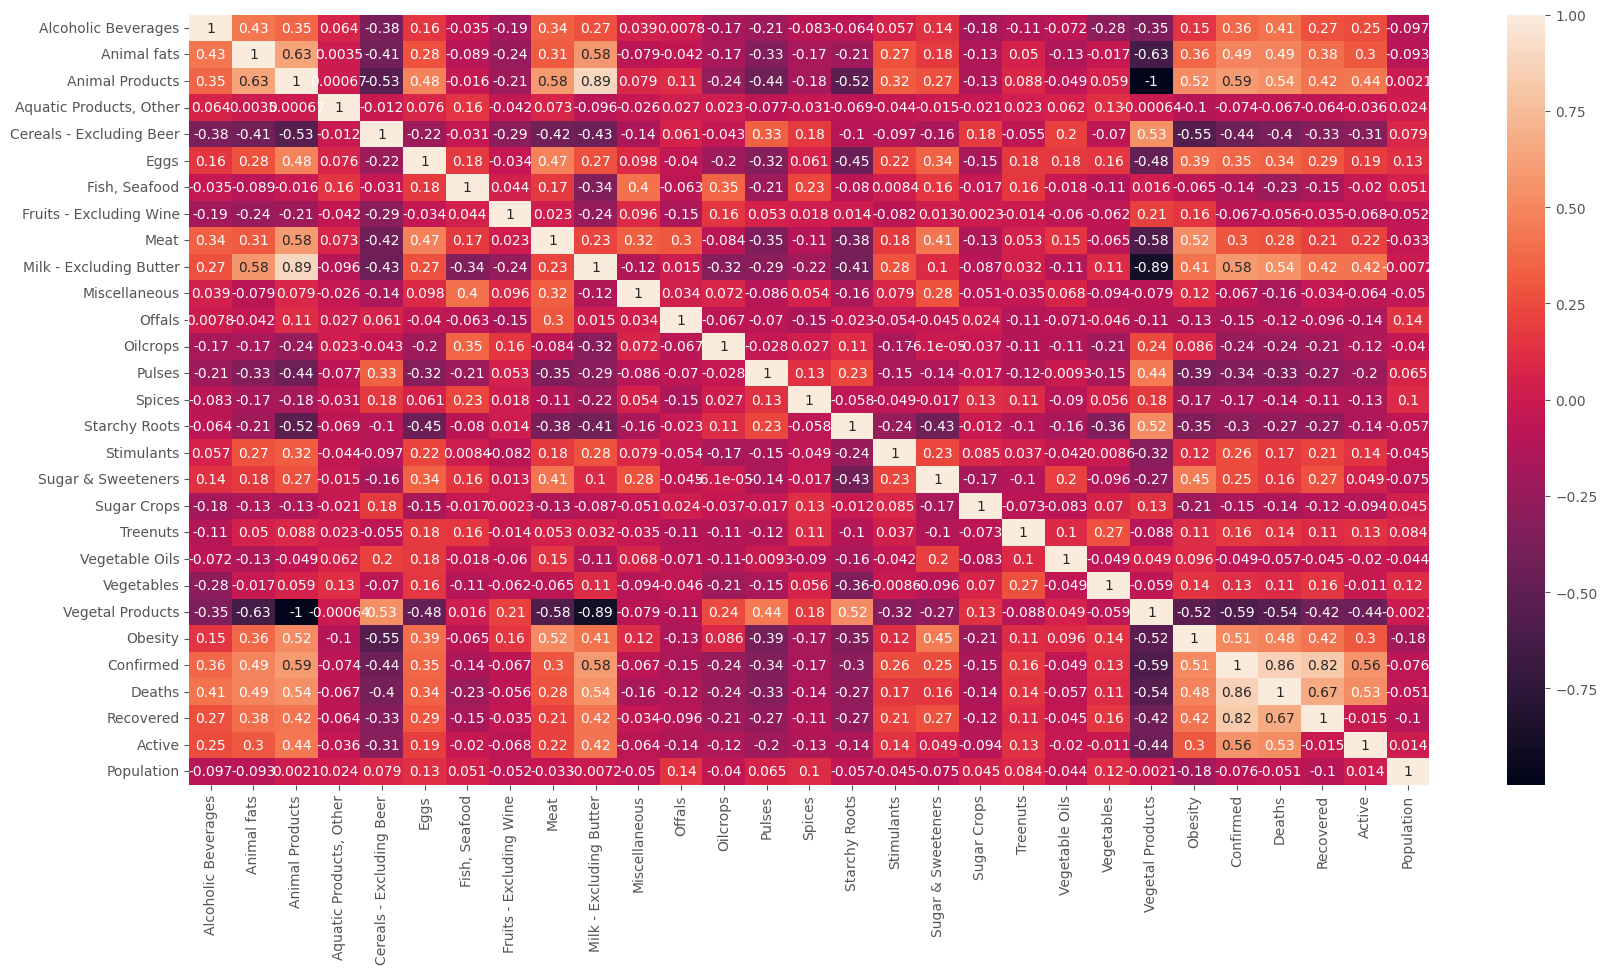

In [73]:
Corr3=df_health.iloc[:, 1:31]
Corr3.drop('Undernourished',axis=1,inplace=True)
Corr3= Corr3.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Corr3, annot=True)
plt.show()

### we will notice here the negative correlation between confirmed cases and veg_product

# Vegan VS Animal

In [77]:
df_health['Alcohol']=df_health['Alcoholic Beverages']
df_health['animal_products']=df_health['Animal Products']+df_health['Eggs']+df_health['Animal fats']+df_health['Meat']+df_health['Fish, Seafood']+df_health['Aquatic Products, Other']+df_health['Milk - Excluding Butter']
df_health['vegan products']=df_health['Fruits - Excluding Wine']+df_health['Oilcrops']+df_health['Pulses']+df_health['Spices']+df_health['Starchy Roots']+df_health['Sugar Crops']+df_health['Treenuts']+df_health['Vegetable Oils']+df_health['Vegetables']+df_health['Vegetal Products']
df_health['manufactured product']=df_health['Stimulants']+df_health['Sugar & Sweeteners']
df_health['other']=df_health['Miscellaneous']+df_health['Offals']


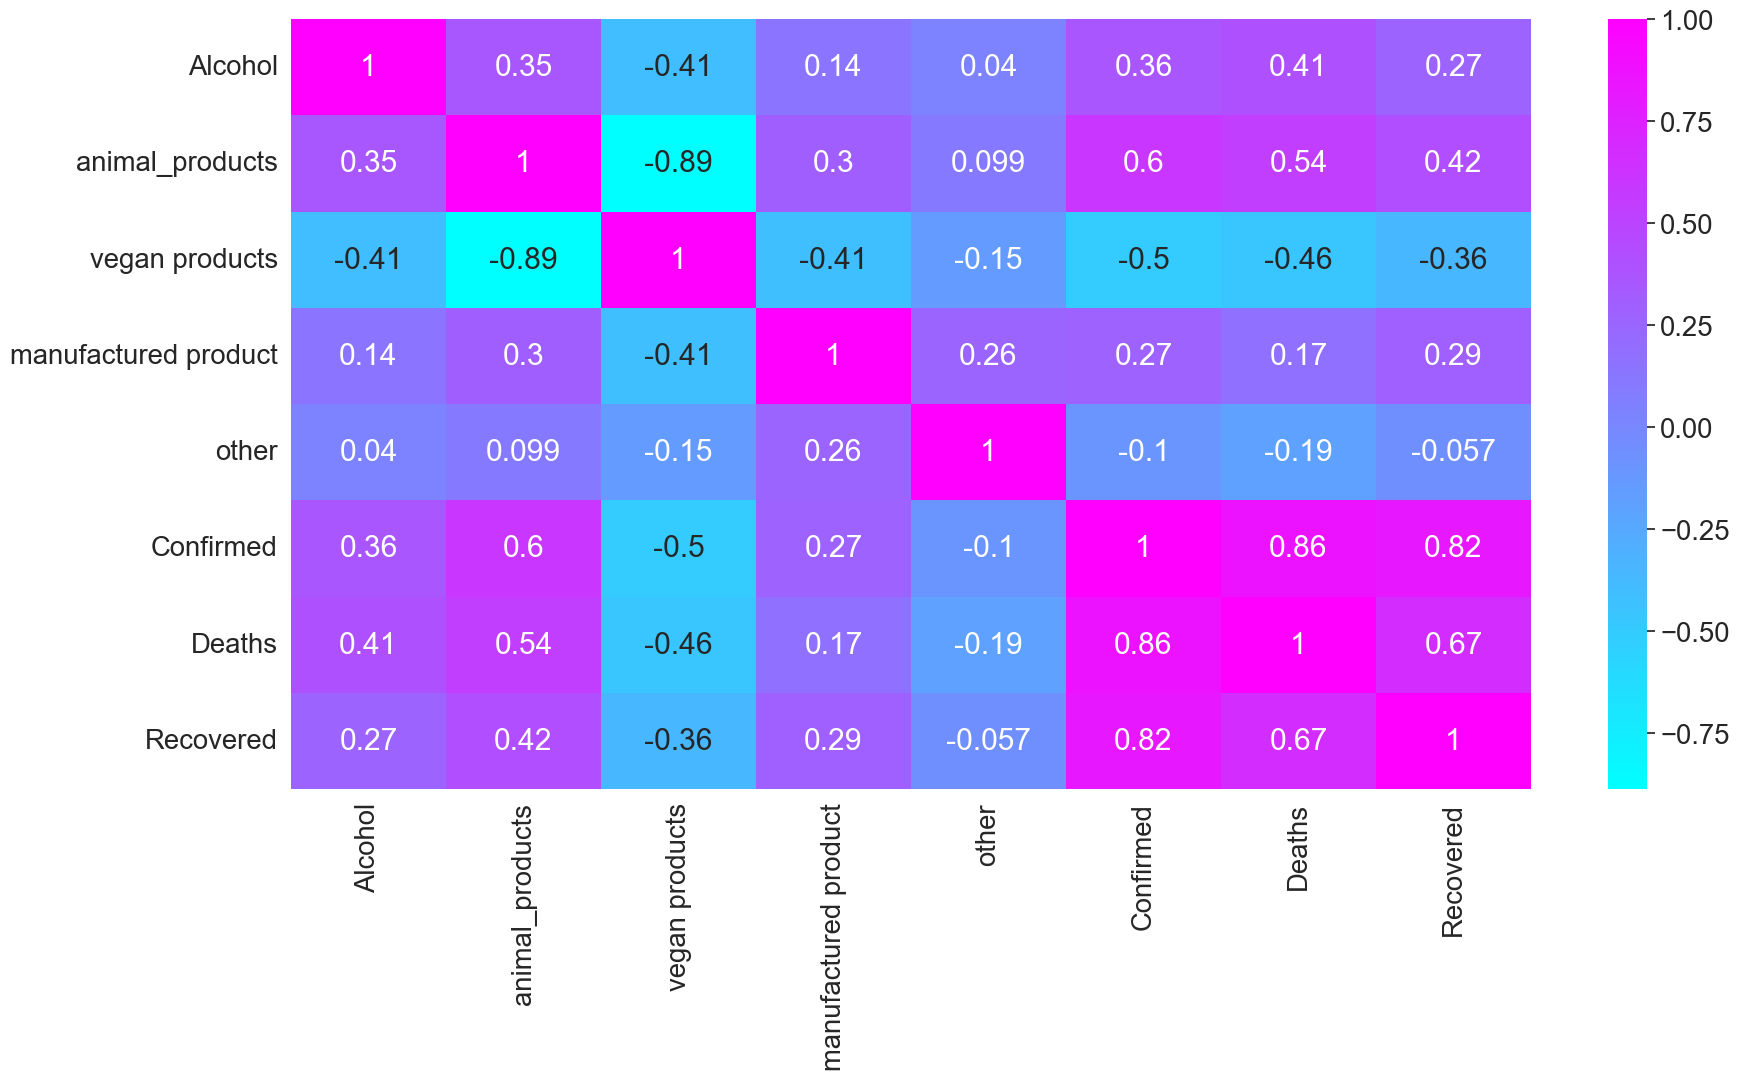

In [81]:
sns.set(font_scale=1.8)
plt.figure(figsize=(20,10))
df_behav=df_health[['Alcohol','animal_products','vegan products','manufactured product','other','Confirmed', 'Deaths','Recovered']]
sns.heatmap(df_behav.corr(),annot=True,cmap="cool")
plt.show()

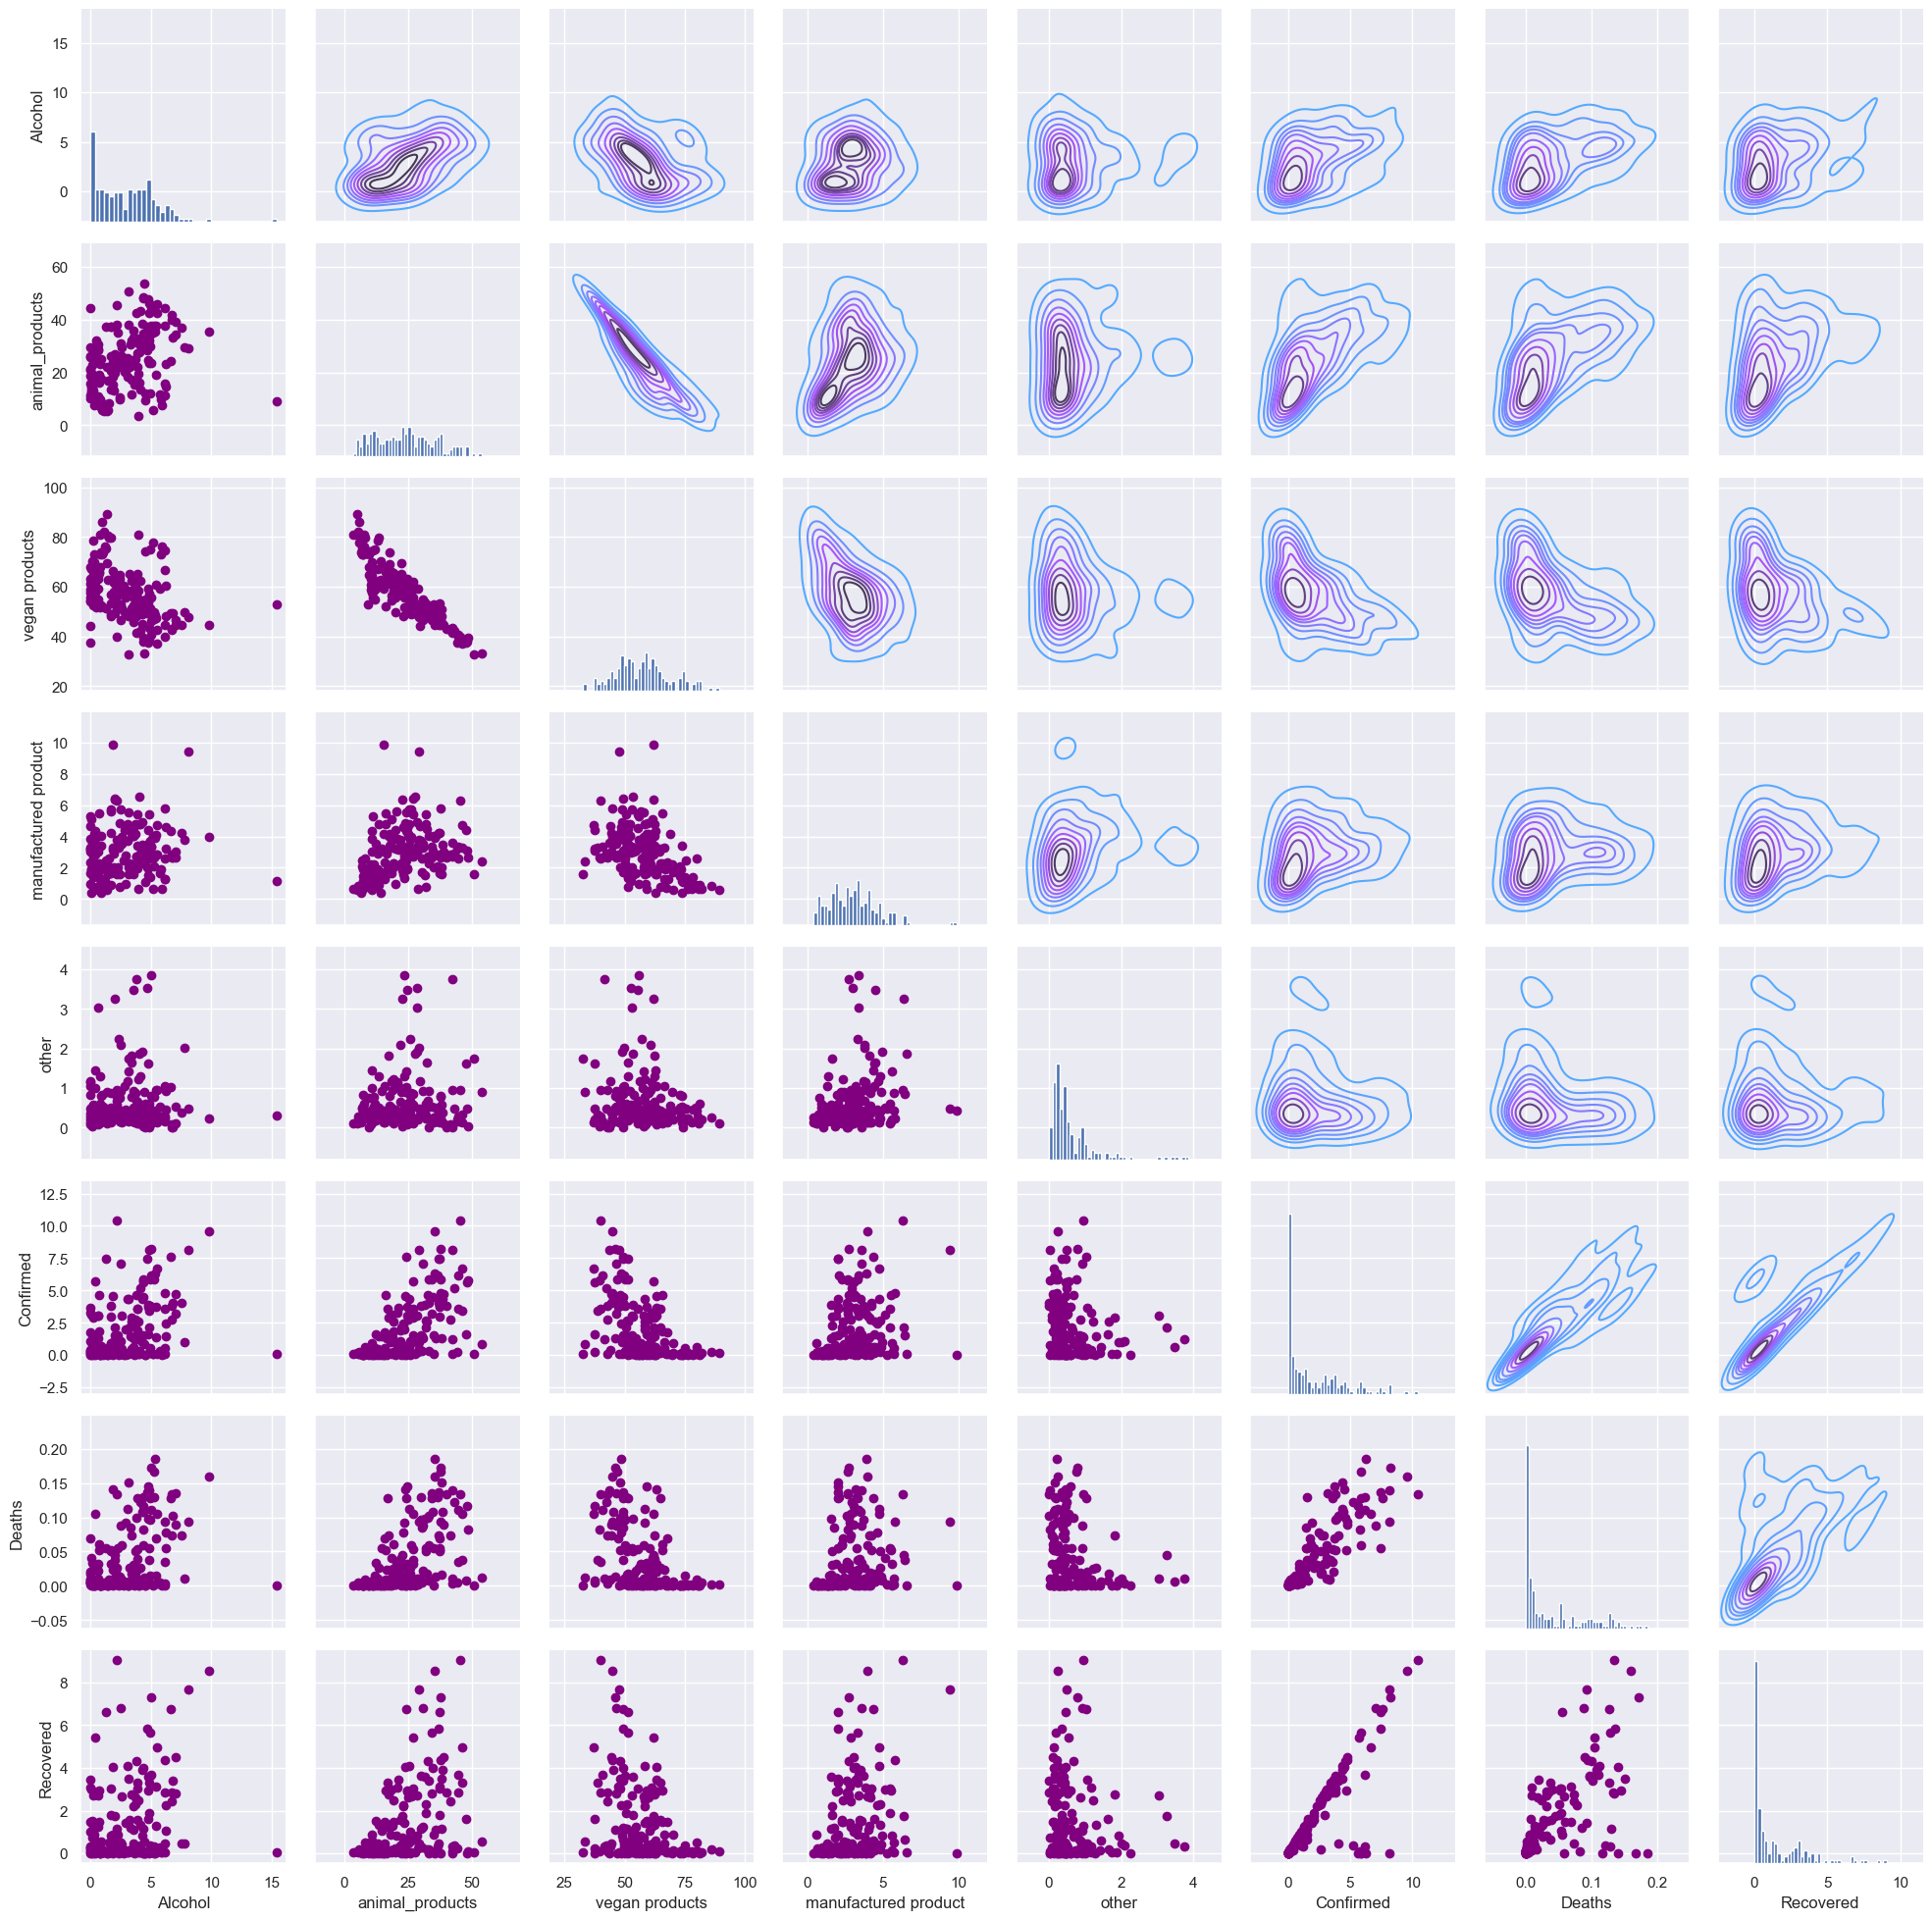

In [84]:
sns.set(font_scale=1)
returns_fig=sns.PairGrid(df_behav)
returns_fig.map_upper(sns.kdeplot,cmap='cool_d')
returns_fig.map_lower(plt.scatter,color='purple')
returns_fig.map_diag(plt.hist,bins=40)
plt.show()

## Conclusion

1- During The corona pandemic, The Most were eating organic food

2- Restaurants That rely on gatherings have faced significant losses

3- Number of branches forms a big difference in sales, it helps to provide Quick Services

4- It is worth relying on franchising for its high potential in achieving high sale

5- Going Vegan Can Reduce Severity Of COVID-19